In [3]:
import sys
from src import model, visualization, evaluate, data
import src.lib.useful_functions as uf

from IPython.display import display, clear_output
import numpy as np
import yaml
import os
import cv2 as cv
import csv
import pandas as pd
import matplotlib.pyplot as plt

## Lost images in server

In [4]:
dataset_df = pd.read_csv("reports/dataset_2020.csv")
print('Days in 2020:', len(dataset_df))

Days in 2020: 366


In [7]:
print('Total images:', dataset_df['Images per day'].sum())
print('NBOF days with less than 144 images:', len(dataset_df.loc[dataset_df['Images per day'] < 144]))

Total images: 51219
NBOF days with less than 144 images 56


## Night Images

In [40]:
night_img_list = []
for i in range(len(dataset_df)):
    
    M = len(dataset_df.values[i][3])
    if M > 2:
        str_list = dataset_df.values[i][3][1:-1].replace('\'',"" )
        str_list = str_list.replace(" ", "")
        lista = str_list.split(",")
        night_img_list = night_img_list + lista
    
print('NBOF images with mean zero:', len(night_img_list))

NBOF images with mean zero: 23126


In [43]:

zero_img_per_hour = {}
zero_img_per_hour_name = {}

for n in range(len(night_img_list)):
    if n % 10000 == 0:
        print(n)
    day = night_img_list[n][8:11]
    hour, minute = int(night_img_list[n][12:14]), int(night_img_list[n][14:16])
    if minute < 30:
        if (hour,0) in zero_img_per_hour.keys():
            zero_img_per_hour_name[(hour,0)].append(night_img_list[n])
            zero_img_per_hour[(hour,0)] += 1
        else:
            zero_img_per_hour_name[(hour,0)] = []
            zero_img_per_hour_name[(hour,0)].append(night_img_list[n])
            zero_img_per_hour[(hour,0)] = 1
    else:
        if (hour,30) in zero_img_per_hour.keys():
            zero_img_per_hour_name[(hour,30)].append(night_img_list[n])
            zero_img_per_hour[(hour,30)] += 1
        else:
            zero_img_per_hour_name[(hour,30)] = []
            zero_img_per_hour_name[(hour,30)].append(night_img_list[n])
            zero_img_per_hour[(hour,30)] = 1


0
10000
20000


In [71]:
sorted_keys = sorted(zero_img_per_hour.keys(), key=lambda element: (element[0], element[1]))

sorted_keys_str = []
for keys in sorted_keys:
    sorted_keys_str.append( str(keys[0]).zfill(2) + ':' + str(keys[1]).zfill(2))
    
print(sorted_keys_str)
print(sorted_values)
    

['00:00', '00:30', '01:00', '01:30', '02:00', '02:30', '03:00', '03:30', '04:00', '04:30', '05:00', '05:30', '06:00', '06:30', '07:00', '07:30', '08:00', '08:30', '09:00', '09:30', '10:00', '11:00', '11:30', '12:00', '13:00', '13:30', '15:30', '16:30', '19:00', '19:30', '21:00', '21:30', '22:00', '22:30', '23:00', '23:30']
[1067, 1068, 1066, 1067, 1067, 1066, 1068, 1066, 1068, 1070, 1070, 1069, 1069, 1069, 1069, 1070, 976, 791, 657, 413, 60, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 88, 478, 693, 835, 1034]


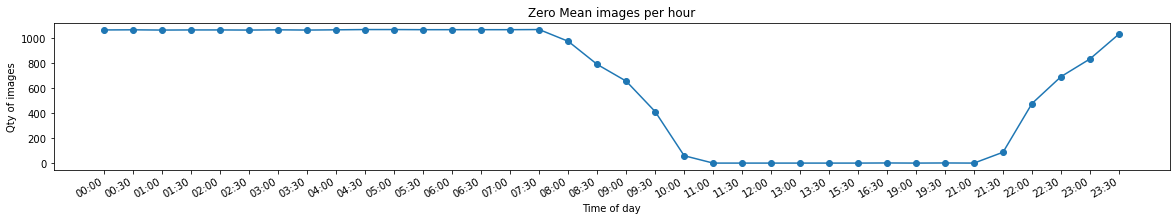

In [75]:
plt.plot(sorted_values, '-o')
plt.xticks(range(len(sorted_keys_str)), sorted_keys_str)
plt.gcf().autofmt_xdate()
plt.title('Zero Mean images per hour')
plt.xlabel('Time of day')
plt.ylabel('Qty of images')
plt.show()

In [74]:
strange_times = [(8,30), (9,0), (9,30), (10,0), (11,0), (11,30), (12,0), (13,0), (13,30), (15,30), (16,30), (19,0), (19,30)]

# for st in strange_times:
#     print(zero_img_per_hour_name[st])

In [4]:
#Muy lento, buscar forma de optimizar
#Demora 35 seg para 100 imagenes, para 51219 se espera 5 hs aprox

# fr_folder_path='/solar/sat/art-rrr/ART_G010x010RR_C010x010/C02-FR/2020'
# mk_folder_path='/solar/sat/art-rrr/ART_G010x010RR_C010x010/C02-MK/2020'
# meta_path='/solar/sat/art-rrr/ART_G010x010RR_C010x010/meta'

# #Iterate from second img to last
# fieldnames = ['Img','Min','Max','Mean','Black Rows','Black cols', 'Next img' , 'RMSE']

# with open(   'reports/img_features.csv', 'w', newline='') as csvfile:
#     writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
#     writer.writeheader()

#     img1_filename = sorted(os.listdir(fr_folder_path))[0]
    
#     img1 = data.load_img(meta_path=meta_path,
#                         img_name=img1_filename,
#                         mk_folder_path=mk_folder_path,
#                         img_folder_path=fr_folder_path
#                         )
#     for filename in sorted(os.listdir(fr_folder_path))[1:]:
#         if (not img1_filename in night_img_list ): #no es una imagen nocturna
#             img2_filename = filename
#             img2 = data.load_img(meta_path=meta_path,
#                                 img_name=img2_filename,
#                                 mk_folder_path=mk_folder_path,
#                                 img_folder_path=fr_folder_path
#                                 )
#             rmse = np.sqrt(np.mean((img1 - img2)**2))
#             row_dict = {}
#             row_dict['Img'] = img1_filename
#             row_dict['Min'] = np.min(img1)
#             row_dict['Max'] = np.max(img1)
#             row_dict['Mean'] = np.mean(img1)
#             row_dict['Next img'] = img2_filename
#             row_dict['RMSE'] = rmse
#             #horizontal black lines finder
#             sum_cols = np.sum(img1,axis=1)
#             aux=0
#             counter = 0
#             for i in range(sum_cols.shape[0]-1):
#                 if sum_cols[i] == sum_cols[i+1] and sum_cols[i] == 0:
#                     aux +=1
#                 if aux > counter :
#                     counter = aux 
#                     aux=0
            
#             row_dict['Black Rows'] = counter
            
#             #vertical black lines finder
#             sum_rows = np.sum(img1,axis=0)
#             aux=0
#             counter = 0
#             for i in range(sum_rows.shape[0]-1):
#                 if sum_rows[i] == sum_rows[i+1] and sum_rows[i] == 0:
#                     aux +=1
#                 if aux > counter :
#                     counter = aux 
#                     aux=0
                    
#             row_dict['Black cols'] = counter

#             writer.writerow(row_dict)
            
#             img1 = img2
#             img1_filename = img2_filename
#         else: #es una imagen nocturna
#             img1_filename = filename

In [4]:
df_features = pd.read_csv("reports/img_features.csv") 
# fieldnames = ['Img','Min','Max','Mean','Black Rows','Black cols', 'Next img' , 'RMSE']
print('Images analized:', len(df_features))

Images analized: 28093


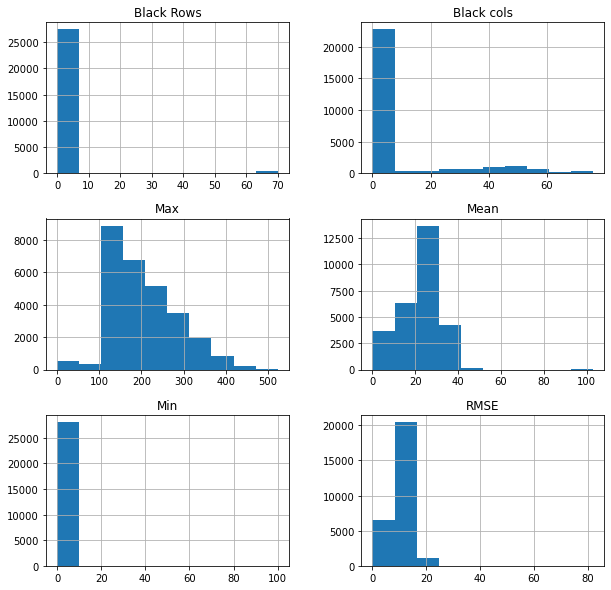

In [77]:
_ = df_features.hist(figsize=(10,10), layout=(3,2))

## Analisis MEAN

In [16]:
print('Mean mean:', df_features['Mean'].mean())
print('Mean std:', df_features['Mean'].std())

Mean mean: 22.243326092460542
Mean std: 9.363863080331832


In [49]:
mean_per_hour = {}
mean_mean_per_hour = {}

for n in range(df_features.shape[0]):
    if n % 10000 == 0:
        print(n)
    hour, minute = int(df_features.values[n][0][12:14]), int(df_features.values[n][0][14:16])
    if minute < 30:
        if (hour,0) in mean_per_hour.keys():
            mean_per_hour[(hour,0)].append(df_features.values[n][3])
        else:
            mean_per_hour[(hour,0)] = []
            mean_per_hour[(hour,0)].append(df_features.values[n][3])
    else:
        if (hour,30) in mean_per_hour.keys():
            mean_per_hour[(hour,30)].append(df_features.values[n][3])
        else:
            mean_per_hour[(hour,30)] = []
            mean_per_hour[(hour,30)].append(df_features.values[n][3])
        
for key in mean_per_hour.keys():
    mean_mean_per_hour[key] = np.mean(mean_per_hour[key])

0
10000
20000


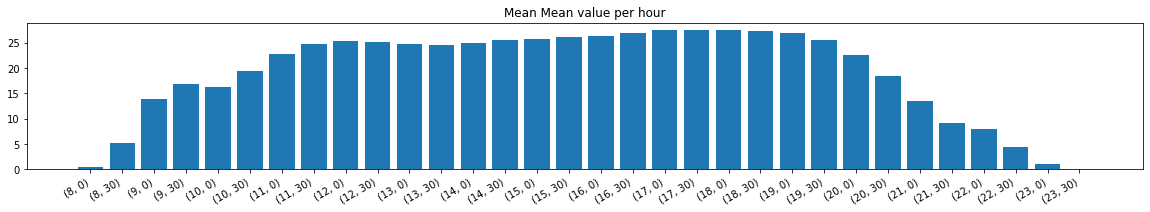

In [57]:
plt.rcParams["figure.figsize"] = (20,3)
plt.title('Mean Mean value per hour')
plt.bar(range(len(mean_mean_per_hour)), mean_mean_per_hour.values(), align='center')
plt.xticks(range(len(mean_mean_per_hour)), list(mean_mean_per_hour.keys()))
plt.gcf().autofmt_xdate()
plt.show()

In [60]:
mean_outliers = df_features.loc[(df_features['Mean'] > 43)]
print(type(mean_outliers))
print(mean_outliers.shape)

<class 'pandas.core.frame.DataFrame'>
(24, 8)


IMG: ART_2020297_102020.FR
Original Mean: 43.838013000000004
DATASET: TRAIN
Actual mean 46.200752


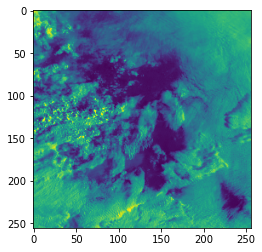

DATASET: TEST


In [91]:
TRAIN_PATH = 'data/mvd/train/'
VAL_PATH = 'data/mvd/validation/'

n = 22

print('IMG:', mean_outliers.values[n][0])
print('Original Mean:', mean_outliers.values[n][3])

try:
    img = np.load(TRAIN_PATH + mean_outliers.values[n][0][4:11] + '/' + mean_outliers.values[n][0][:-2] + 'npy')
    print('DATASET: TRAIN')
    print('MVD mean', np.mean(img))
    plt.imshow(img)
    plt.show()  
except:
    img = np.load(VAL_PATH + mean_outliers.values[n][0][4:11] + '/' + mean_outliers.values[n][0][:-2] + 'npy')
    print('DATASET: VAL')
    print('MVD mean', np.mean(img))
    plt.imshow(img)
    plt.show()
finally: 
    print('DATASET: TEST')

## Analisis MIN

In [5]:
print('Min mean:', df_features['Min'].mean())
print('Min std:', df_features['Min'].std())

Min mean: 1.7096335724475813
Min std: 1.3996447882229104


In [19]:
min_outliers = df_features.loc[(df_features['Min'] > 5)]
print(min_outliers.shape)

(8, 8)


IMG: ART_2020022_110016.FR
Original Min: 5.063794000000001
DATASET: VAL
MVD min 10.605452


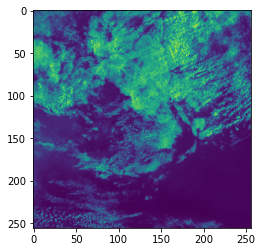

DATASET: TEST


In [31]:
TRAIN_PATH = 'data/mvd/train/'
VAL_PATH = 'data/mvd/validation/'

n = 3

print('IMG:', min_outliers.values[n][0])
print('Original Min:', min_outliers.values[n][1])

try:
    img = np.load(TRAIN_PATH + min_outliers.values[n][0][4:11] + '/' + min_outliers.values[n][0][:-2] + 'npy')
    print('DATASET: TRAIN')
    print('MVD min', np.min(img))
    plt.imshow(img)
    plt.show()  
except:
    img = np.load(VAL_PATH + min_outliers.values[n][0][4:11] + '/' + min_outliers.values[n][0][:-2] + 'npy')
    print('DATASET: VAL')
    print('MVD min', np.min(img))
    plt.imshow(img)
    plt.show()
finally: 
    print('DATASET: TEST')

In [47]:
min_per_hour = {}
mean_min_per_hour = {}

for n in range(df_features.shape[0]):
    if n % 10000 == 0:
        print(n)
    hour, minute = int(df_features.values[n][0][12:14]), int(df_features.values[n][0][14:16])
    if minute < 30:
        if (hour,0) in min_per_hour.keys():
            min_per_hour[(hour,0)].append(df_features.values[n][1])
        else:
            min_per_hour[(hour,0)] = []
            min_per_hour[(hour,0)].append(df_features.values[n][1])
    else:
        if (hour,30) in min_per_hour.keys():
            min_per_hour[(hour,30)].append(df_features.values[n][1])
        else:
            min_per_hour[(hour,30)] = []
            min_per_hour[(hour,30)].append(df_features.values[n][1])
        
for key in min_per_hour.keys():
    mean_min_per_hour[key] = np.mean(min_per_hour[key])


0
10000
20000


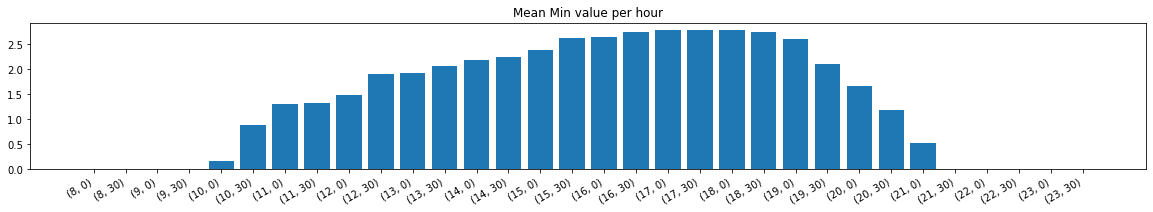

In [48]:
plt.rcParams["figure.figsize"] = (20,3)
plt.title('Mean Min value per hour')
plt.bar(range(len(mean_min_per_hour)), mean_min_per_hour.values(), align='center')
plt.xticks(range(len(mean_min_per_hour)), list(mean_min_per_hour.keys()))
plt.gcf().autofmt_xdate()
plt.show()

## Analisis MAX

In [41]:
print('Max mean:', df_features['Max'].mean())
print('Max std:', df_features['Max'].std())

Max mean: 202.5362296597002
Max std: 81.20340723404325


In [44]:
# mean min value in each hour
max_per_hour = {}
mean_max_per_hour = {}

for n in range(df_features.shape[0]):
    if n % 10000 == 0:
        print(n)
    hour, minute = int(df_features.values[n][0][12:14]), int(df_features.values[n][0][14:16])
    if minute < 30:
        if (hour,0) in max_per_hour.keys():
            max_per_hour[(hour,0)].append(df_features.values[n][2])
        else:
            max_per_hour[(hour,0)] = []
            max_per_hour[(hour,0)].append(df_features.values[n][2])
    else:
        if (hour,30) in max_per_hour.keys():
            max_per_hour[(hour,30)].append(df_features.values[n][2])
        else:
            max_per_hour[(hour,30)] = []
            max_per_hour[(hour,30)].append(df_features.values[n][2])
        
for key in max_per_hour.keys():
    mean_max_per_hour[key] = np.mean(max_per_hour[key])

0
10000
20000


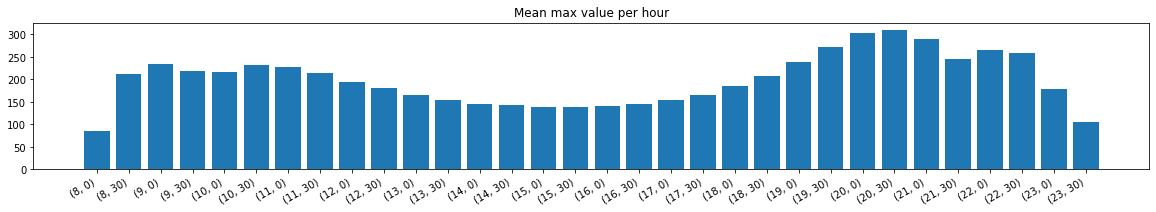

In [46]:

plt.rcParams["figure.figsize"] = (20,3)
plt.title('Mean max value per hour')
plt.bar(range(len(mean_max_per_hour)), mean_max_per_hour.values(), align='center')
plt.xticks(range(len(mean_max_per_hour)), list(mean_max_per_hour.keys()))
plt.gcf().autofmt_xdate()
plt.show()

## Black rows 

In [105]:

black_rows_df = df_features.loc[(df_features['Black Rows'] > 1) & (df_features['Max'] > 0) & (df_features['Mean'] > 1)]
        
print('Imgs with black rows:', black_rows_df.shape[0])

print('Example:', black_rows_df['Img'].values[0])

days_w_br = black_rows_df['Img'][:].tolist()
days_w_br = [int(day[8:11]) for day in days_w_br]
days_w_br = list(np.unique(days_w_br))

print(days_w_br)

Imgs with black rows: 58
Example: ART_2020050_193019.FR
[50, 145, 157, 158, 159, 160, 161, 167, 174, 179, 180, 243, 244, 261, 262, 267, 278, 281, 294, 307, 317, 323, 337, 339, 347, 350, 357, 359]


In [114]:
TRAIN_PATH = 'data/mvd/train/'
VAL_PATH = 'data/mvd/validation/'

n = 11

print('IMG:', black_rows_df.values[n][0])
print('Original BR:', black_rows_df.values[n][4])

if int(black_rows_df.values[n][0][12:14]) < 23:
    try:
        img = np.load(TRAIN_PATH + black_rows_df.values[n][0][4:11] + '/' + black_rows_df.values[n][0][:-2] + 'npy')
        print('DATASET: TRAIN')
        plt.imshow(img)
        plt.show()  
    except:
        img = np.load(VAL_PATH + black_rows_df.values[n][0][4:11] + '/' + black_rows_df.values[n][0][:-2] + 'npy')
        print('DATASET: VAL')
        plt.imshow(img)
        plt.show()
    finally: 
        print('DATASET: TEST')

IMG: ART_2020014_233019.FR
Original BR: 8


In [ ]:

for i in range(len(df_features)):
    if df_features['Max'][i]> 0 and df_features['Black Rows'][i] > 0 and df_features['Mean'][i] > 1 :
        aux = [df_features['Img'][i] ,  df_features['Black Rows'][i]]
        blackRow_filename.append(aux )
print('Imagenes con filas negras:',len(blackRow_filename))

## RMSE with persistence

In [6]:
print('RMSE mean:', df_features['RMSE'].mean())
print('RMSE std:', df_features['RMSE'].std())
print('RMSE max:', df_features['RMSE'].max())


RMSE mean: 10.34382642218959
RMSE std: 3.3342227836050524
RMSE max: 82.01935


In [13]:
rmse_diff = df_features.loc[(df_features['RMSE']>30) & (df_features['Black Rows'] == 0) & (df_features['Max'] > 0) & (df_features['Mean'] > 1)]
print(rmse_diff.shape[0])

print(rmse_diff['Img'].tolist())
print(rmse_diff['Next img'].tolist())



19
['ART_2020006_213020.FR', 'ART_2020009_151021.FR', 'ART_2020009_155021.FR', 'ART_2020010_173021.FR', 'ART_2020012_094020.FR', 'ART_2020126_132014.FR', 'ART_2020148_181016.FR', 'ART_2020174_185022.FR', 'ART_2020243_195020.FR', 'ART_2020244_142020.FR', 'ART_2020266_190016.FR', 'ART_2020278_163019.FR', 'ART_2020279_163018.FR', 'ART_2020281_163018.FR', 'ART_2020294_163019.FR', 'ART_2020339_163013.FR', 'ART_2020342_114012.FR', 'ART_2020347_101012.FR', 'ART_2020350_192022.FR']
['ART_2020007_001020.FR', 'ART_2020009_155021.FR', 'ART_2020009_160021.FR', 'ART_2020011_103021.FR', 'ART_2020012_174020.FR', 'ART_2020126_133014.FR', 'ART_2020156_143017.FR', 'ART_2020174_190022.FR', 'ART_2020243_200020.FR', 'ART_2020244_143020.FR', 'ART_2020266_191016.FR', 'ART_2020278_164019.FR', 'ART_2020279_164018.FR', 'ART_2020281_164018.FR', 'ART_2020294_164019.FR', 'ART_2020339_164013.FR', 'ART_2020342_115012.FR', 'ART_2020347_102012.FR', 'ART_2020350_193022.FR']


Min Histogram
100.0
(array([763], dtype=int64),)
[763, 1803, 1804, 1805, 1892, 1893, 2070, 2247]


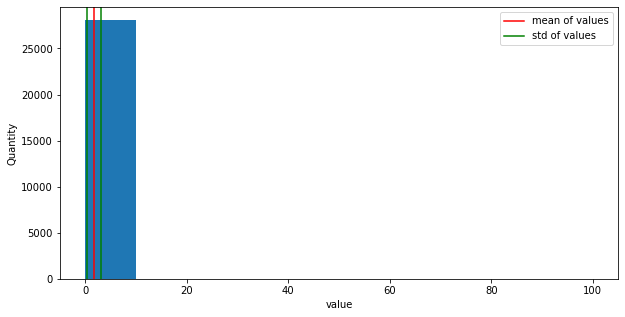

Max Histogram


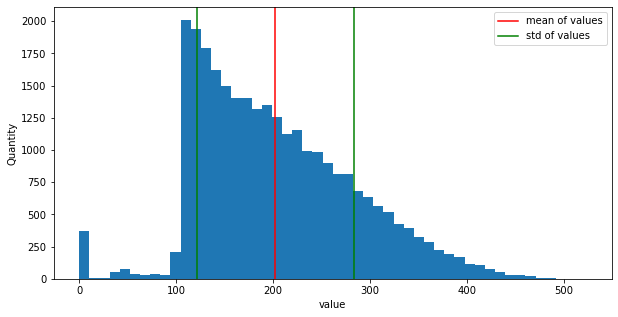

Mean Histogram


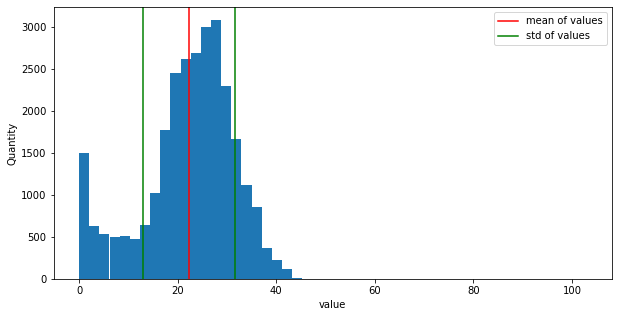

Max mean =  102.902885
Indexes with mean over 100
[763]


In [4]:
img_max = df_features['Max'].tolist()
img_min = df_features['Min'].tolist()
img_mean = df_features['Mean'].tolist()
black_rows = df_features['Black Rows'].tolist()
black_cols = df_features['Black cols'].tolist()
black_rows = list(filter(lambda black_rows: black_rows>0, black_rows))
black_cols = list(filter(lambda black_cols: black_cols>0, black_cols))
print('Min Histogram')
print(np.max(img_min))
print(np.where(img_min == np.max(img_min)))
print([i for i in range(len(img_min)) if img_min[i] > 5])
visualization.plot_histogram(img_min,bins=10, normalize = False)
print('Max Histogram')
visualization.plot_histogram(img_max,bins=50, normalize= False)
print('Mean Histogram')
visualization.plot_histogram(img_mean,bins=50, normalize = False)
print('Max mean = ',np.max(img_mean))
print('Indexes with mean over 100')
print([i for i in range(len(img_mean)) if img_mean[i] > 100])

BLACK ROWS


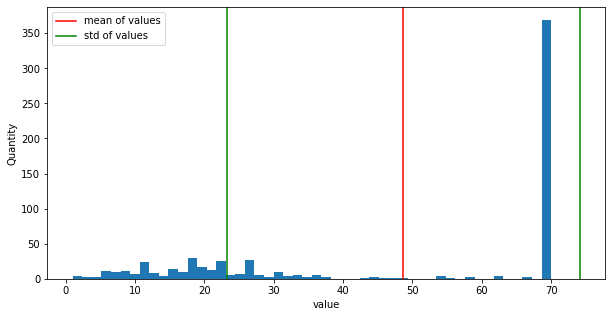

BLACK COLUMNS


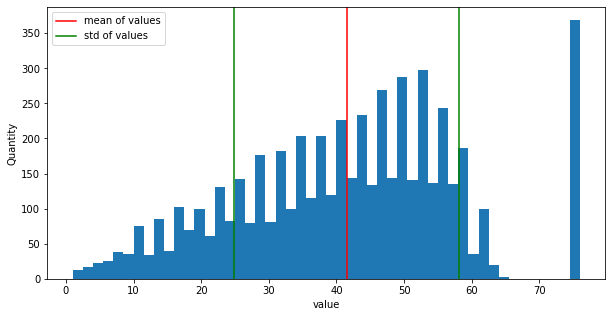

In [36]:
black_rows = df_features['Black Rows'].tolist()
black_cols = df_features['Black cols'].tolist()
black_rows = list(filter(lambda black_rows: black_rows >0, black_rows))
black_cols = list(filter(lambda black_cols: black_cols >0, black_cols))

print('BLACK ROWS')
visualization.plot_histogram(black_rows,bins=50, normalize= False)
print('BLACK COLUMNS')
visualization.plot_histogram(black_cols,bins=50, normalize = False)

In [36]:
print('Cantidad imagenes:',len(df_features))

blackRow_filename = []
low_max = []
night = []

for i in range(len(df_features)):
    if df_features['Max'][i]> 0 and df_features['Black Rows'][i] > 0 and df_features['Mean'][i] > 1 :
        aux = [df_features['Img'][i] ,  df_features['Black Rows'][i]]
        blackRow_filename.append(aux )
print('Imagenes con filas negras:',len(blackRow_filename))
    
for i in range(len(df_features)):
    if 0< df_features['Max'][i] <100 and df_features['Mean'][i] > 5 :
        aux = [df_features['Img'][i] ,  df_features['Max'][i]]
        low_max.append(aux )
print('Imagenes con maximo bajo:',len(low_max))

for i in range(len(df_features)):
    if df_features['Max'][i] == 0 :
        aux = [df_features['Img'][i] ,  df_features['Mean'][i]]
        night.append(aux)
print('Imagenes amaneciendo/anocheciendo:', len(night))

Cantidad imagenes: 28093
Imagenes con filas negras: 58
Imagenes con maximo bajo: 7
Imagenes amaneciendo/anocheciendo: 369


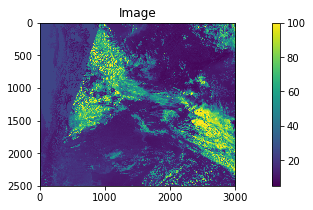

ART_2020027_104015.FR
mean: 28.015526
std deviation 22.311386
min: 5.0362945
max: 100.0
Black rows: ART_2020001_083021.FR


In [33]:
#SERVER
fr_folder_path='/solar/sat/art-rrr/ART_G010x010RR_C010x010/C02-FR/2020'
mk_folder_path='/solar/sat/art-rrr/ART_G010x010RR_C010x010/C02-MK/2020'
meta_path='/solar/sat/art-rrr/ART_G010x010RR_C010x010/meta'


# comentario = []
# for filename in night:
[763, 1803, 1804, 1805, 1892, 1893, 2070, 2247]
filename = df_features['Img'].to_list()
img_filename = filename[2247]
#img_filename = filename[763]  degrade

#img_filename = 'ART_2020001_223021.FR'

img1 = data.load_img(meta_path=meta_path,
            img_name=img_filename,
            mk_folder_path=mk_folder_path,
            img_folder_path=fr_folder_path
    )

if(False):
    img1[img1>100] = np.mean(img1)
if(False):
    img1[img1>100] = 100
if(True):
    img1[img1>100+np.std(img1)] = np.mean(img1)
    img1[img1>100] = 100
visualization.show_image_w_colorbar(img1)
print(img_filename)
print('mean:',np.mean(img1))
print('std deviation', np.std(img1))
print('min:',np.min(img1))
print('max:',np.max(img1))

    
print('Black rows:', filename[1])
M,N = img1.shape
if (np.sum(img1[0:M//2,0:N//2])==0):
    print('Q1 es 0')
if (np.sum(img1[0:M//2,N//2:N])==0):  
    print('Q2 es 0')
if (np.sum(img1[M//2:M,0:N//2])==0):
    print('Q3 es 0')
if (np.sum(img1[M//2:M,N//2:N])==0):
    print('Q4 es 0')
    
#comentario.append(input())
clear_output(wait=True)
    

In [12]:
print(comentario[18])

b
